<a href="https://colab.research.google.com/github/SwadhiRSSRS/Computer-Vision-and-its-Applications/blob/main/CVA%20EX%202/AI19641_CVA_EX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX 2

 Build a simple CNN model for image segmentation


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [ ]:
x_train=x_train.astype("float32")/255.0 #normalize
x_test=x_test.astype("float32")/255.0

In [ ]:
x_train =np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

In [ ]:
y_train=(x_train>0.5).astype("float32")
y_test=(x_test>0.5).astype("float32")

In [ ]:
def build_segmentation_model():
    inputs = Input(shape=(28, 28, 1))

    # Encoder (Downsampling)
    x = Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = MaxPooling2D((2, 2))(x)

    # Decoder (Upsampling)
    x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = UpSampling2D((2, 2))(x)

    # Output Layer (Segmentation Mask)
    outputs = Conv2D(1, (1, 1), activation="sigmoid", padding="same")(x)

    model = Model(inputs, outputs)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
model = build_segmentation_model()
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9331 - loss: 0.1508 - val_accuracy: 0.9525 - val_loss: 0.0946
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9522 - loss: 0.0943 - val_accuracy: 0.9529 - val_loss: 0.0912
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9526 - loss: 0.0912 - val_accuracy: 0.9530 - val_loss: 0.0894
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9528 - loss: 0.0897 - val_accuracy: 0.9532 - val_loss: 0.0881
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9528 - loss: 0.0888 - val_accuracy: 0.9533 - val_loss: 0.0871


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


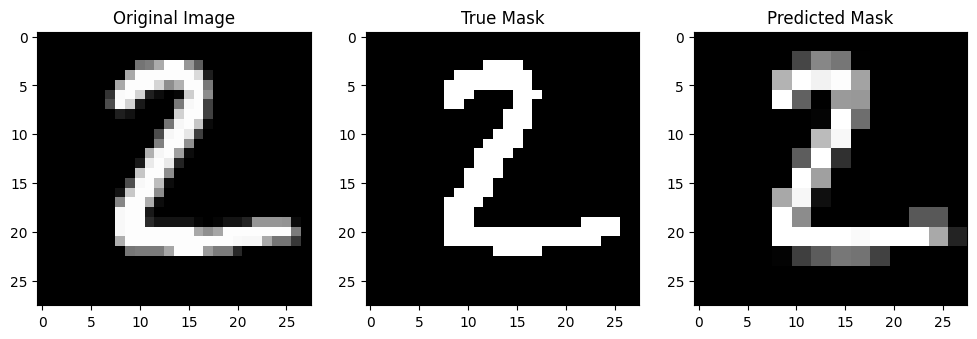

In [ ]:
def predict_and_display(index):
    sample = x_test[index:index+1]
    prediction = model.predict(sample)[0]

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(sample.squeeze(), cmap="gray")
    axes[0].set_title("Original Image")
    axes[1].imshow(y_test[index].squeeze(), cmap="gray")
    axes[1].set_title("True Mask")
    axes[2].imshow(prediction.squeeze(), cmap="gray")
    axes[2].set_title("Predicted Mask")
    plt.show()

# Show results on a random test sample
predict_and_display(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


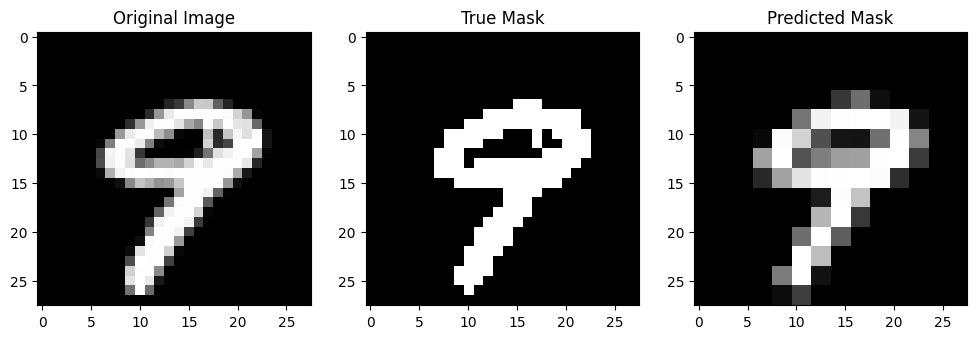

In [ ]:
predict_and_display(9)